In [1]:
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.dates as dates
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.tsa.stattools import pacf
from statsmodels.tsa.arima_model import ARIMA

C:\Users\korea\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


In [31]:
train=pd.read_csv('../train.csv', parse_dates=[1], infer_datetime_format=True)

In [32]:
train.head()

,item_nbr,date,store_nbr,unit_sales,onpromotion,type,cluster,dcoilwtico,hol_National,hol_Regional,family,class,perishable
0,103501,2015-02-13,10,2.0,False,C,15,52.66,0,0,CLEANING,3008,0
1,103501,2015-02-13,17,7.0,False,C,12,52.66,0,0,CLEANING,3008,0
2,103501,2015-02-13,18,2.0,False,B,16,52.66,0,0,CLEANING,3008,0
3,103501,2015-02-13,20,7.0,False,B,6,52.66,0,0,CLEANING,3008,0
4,103520,2015-02-13,1,6.0,False,D,13,52.66,0,0,GROCERY I,1028,0


In [104]:
train4=train.iloc[train.index[train.store_nbr==20]]

In [105]:
train4=train4.reset_index()
train4=train4.drop('index', axis=1)

In [106]:
train4.head()

,item_nbr,date,store_nbr,unit_sales,onpromotion,type,cluster,dcoilwtico,hol_National,hol_Regional,family,class,perishable
0,103501,2015-02-13,20,7.0,False,B,6,52.66,0,0,CLEANING,3008,0
1,105576,2015-02-13,20,56.0,False,B,6,52.66,0,0,GROCERY I,1045,0
2,105693,2015-02-13,20,5.0,False,B,6,52.66,0,0,GROCERY I,1034,0
3,106716,2015-02-13,20,22.0,False,B,6,52.66,0,0,GROCERY I,1032,0
4,108079,2015-02-13,20,1.0,False,B,6,52.66,0,0,GROCERY I,1030,0


In [107]:
train4_beverages=train4.iloc[train4.index[train4.family=='BEVERAGES']]

In [108]:
train4_beverages=train4_beverages.reset_index()

In [109]:
train4_beverages=train4_beverages.drop('index', axis=1)

In [115]:
train4_beverages.groupby('item_nbr').mean()

,store_nbr,unit_sales,onpromotion,cluster,dcoilwtico,hol_National,hol_Regional,class,perishable
item_nbr,,,,,,,,,
119624,20.0,3.667368,0.044211,6.0,45.066492,0.004211,0.094737,1122.0,0.0
165550,20.0,4.345652,0.047826,6.0,46.010676,0.004348,0.095652,1124.0,0.0
165551,20.0,3.463190,0.015337,6.0,46.979845,0.006135,0.113497,1124.0,0.0
165553,20.0,1.948529,0.011029,6.0,47.912642,0.003676,0.066176,1124.0,0.0
174081,20.0,3.156823,0.000000,6.0,45.670436,0.002037,0.097760,1136.0,0.0
219147,20.0,1.979899,0.080402,6.0,45.569409,0.005025,0.092965,1122.0,0.0
219150,20.0,9.185950,0.000000,6.0,45.376098,0.004132,0.109504,1122.0,0.0
219152,20.0,4.494145,0.004684,6.0,45.293754,0.004684,0.119438,1122.0,0.0
257847,20.0,6.620609,0.044496,6.0,46.043032,0.002342,0.058548,1120.0,0.0


In [43]:
index=list(index)

In [90]:
family, itmnbr=index[0]

In [139]:
itmnbr

270522

In [199]:
auto_275022=train44.iloc[train44.index[train44.item_nbr==360313]]

In [200]:
date=auto_275022.date
x=[i for i in range(len(date))]
unitsales=auto_275022.unit_sales

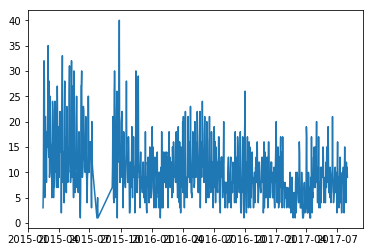

In [201]:
plt.plot(date, unitsales)

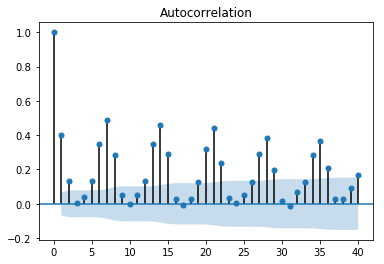

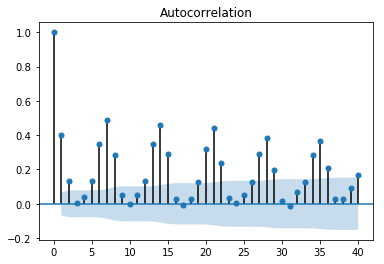

In [202]:
plot_acf(unitsales.values, lags=40)

In [203]:
pacfval=pacf(unitsales.values)

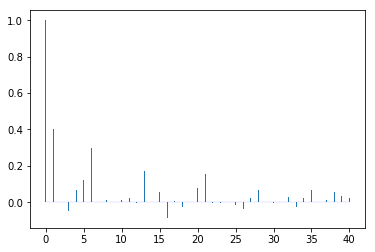

In [204]:
x=[i for i in range(len(pacfval))]
plt.bar(x, pacfval, width=0.1)
plt.hlines(0, xmin=0, xmax=40,colors='b', linestyles='solid', linewidth=0.1)

In [217]:
diffs=[]
unival=unitsales.values
for i in range(len(unival)):
    if  i>7:
        dff=unival[i]-unival[i-7]
        diffs.append(dff)

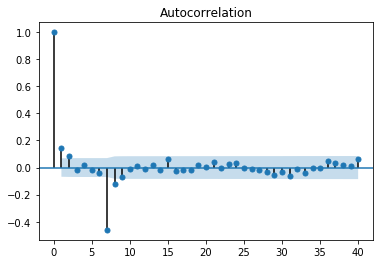

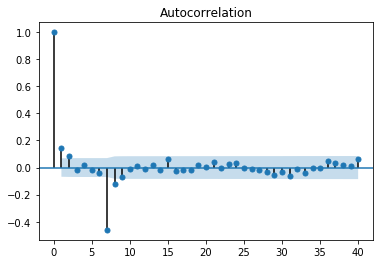

In [218]:
plot_acf(diffs, lags=40)

In [219]:
pacval2=pacf(diffs)

<Container object of 41 artists>

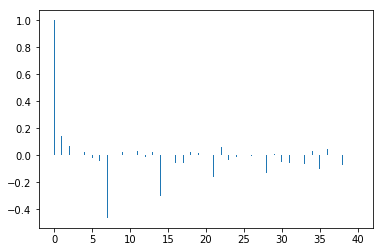

In [220]:
plt.bar(x, pacval2, width=0.1)

In [187]:
series=pd.Series(unitsales.values, index=date)

In [188]:
arima=ARIMA(series, order=(0,1,1))
arima_fit=arima.fit(disp=0)

In [189]:
forecast=arima_fit.forecast(steps=15)[0]

In [190]:
def inverse_difference(history, yhat, interval=1):
    return yhat+history[-interval]

In [191]:
history=[]
day=1
for yhat in forecast:    
    inverted=inverse_difference(series, yhat, 365)
    history.append(inverted)
    day+=1

In [192]:
history

[3.8505507960581644,
 3.8499541667841393,
 3.8493575375101141,
 3.848760908236089,
 3.8481642789620638,
 3.8475676496880387,
 3.8469710204140135,
 3.8463743911399884,
 3.8457777618659632,
 3.8451811325919381,
 3.8445845033179129,
 3.8439878740438878,
 3.8433912447698626,
 3.8427946154958375,
 3.8421979862218123]

In [169]:
test44_270522

,item_nbr,date,store_nbr,unit_sales,onpromotion,type,cluster,dcoilwtico,hol_National,hol_Regional,family,class,perishable
0,270522,2017-08-02,45,3.0,False,A,11,49.60,0,0,AUTOMOTIVE,6806,0
1,270522,2017-08-03,47,2.0,False,A,14,49.03,0,0,AUTOMOTIVE,6806,0
2,270522,2017-08-04,45,4.0,False,A,11,49.57,0,0,AUTOMOTIVE,6806,0
3,270522,2017-08-05,45,6.0,False,A,11,NaN,0,0,AUTOMOTIVE,6806,0
4,270522,2017-08-06,45,6.0,False,A,11,NaN,0,0,AUTOMOTIVE,6806,0
5,270522,2017-08-08,45,1.0,False,A,11,49.07,0,0,AUTOMOTIVE,6806,0
6,270522,2017-08-09,45,2.0,False,A,11,49.59,0,0,AUTOMOTIVE,6806,0
7,270522,2017-08-10,45,1.0,False,A,11,48.54,0,0,AUTOMOTIVE,6806,0
8,270522,2017-08-11,45,3.0,False,A,11,48.81,0,1,AUTOMOTIVE,6806,0
9,270522,2017-08-14,45,1.0,False,A,11,47.59,0,0,AUTOMOTIVE,6806,0


In [166]:
x=[i for i in range(15)]

In [150]:
len(history)

15

In [159]:
test

,item_nbr,date,store_nbr,unit_sales,onpromotion,type,cluster,dcoilwtico,hol_National,hol_Regional,family,class,perishable
1,96995,2017-08-01,4,1.0,False,D,9,49.19,0,0,GROCERY I,1093,0
2,96995,2017-08-01,7,1.0,False,D,8,49.19,0,0,GROCERY I,1093,0
3,96995,2017-08-01,8,1.0,False,D,8,49.19,0,0,GROCERY I,1093,0
4,96995,2017-08-01,44,2.0,False,A,5,49.19,0,0,GROCERY I,1093,0
5,96995,2017-08-01,49,1.0,False,A,11,49.19,0,0,GROCERY I,1093,0
6,99197,2017-08-01,4,1.0,False,D,9,49.19,0,0,GROCERY I,1067,0
7,99197,2017-08-01,8,1.0,False,D,8,49.19,0,0,GROCERY I,1067,0
8,99197,2017-08-01,48,1.0,False,A,14,49.19,0,0,GROCERY I,1067,0
9,103501,2017-08-01,9,4.0,False,B,6,49.19,0,0,CLEANING,3008,0
10,103501,2017-08-01,10,3.0,False,C,15,49.19,0,0,CLEANING,3008,0


In [154]:
## test44=test.iloc[test.index[test.store_nbr==44]]
test44=test44.reset_index()
test44=test44.drop('index', axis=1)
test44.head()

test44_270522=test44.iloc[test44.index[test44.item_nbr==270522]]
test44_270522=test44_270522.reset_index()
test44_270522=test44_270522.drop('index', axis=1)


In [156]:
date44=test44_270522.date
unitsales44=test44_270522.unit_sales

In [145]:
forecast=inverse_difference(series, forecast, 365)

In [146]:
forecast

array([ 3.8505508])

In [108]:
print(arima_fit.summary())

                             ARIMA Model Results                              
Dep. Variable:                    D.y   No. Observations:                  652
Model:                 ARIMA(0, 1, 1)   Log Likelihood               -1494.034
Method:                       css-mle   S.D. of innovations              2.381
Date:                Mon, 27 Nov 2017   AIC                           2994.069
Time:                        21:08:22   BIC                           3007.509
Sample:                    02-14-2015   HQIC                          2999.281
                         - 07-31-2017                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0006      0.000     -1.207      0.228      -0.002       0.000
ma.L1.D.y     -1.0000      0.005   -183.300      0.000      -1.011      -0.989
                                    Roots           

In [20]:
test=pd.read_csv('../test.csv', parse_dates=[1], infer_datetime_format=True)

In [21]:
test.head()

,Unnamed: 0,item_nbr,date,store_nbr,unit_sales,onpromotion,type,cluster,dcoilwtico,hol_National,hol_Regional,family,class,perishable
0,1,96995,2017-08-01,4,1.0,False,D,9,49.19,0,0,GROCERY I,1093,0
1,2,96995,2017-08-01,7,1.0,False,D,8,49.19,0,0,GROCERY I,1093,0
2,3,96995,2017-08-01,8,1.0,False,D,8,49.19,0,0,GROCERY I,1093,0
3,4,96995,2017-08-01,44,2.0,False,A,5,49.19,0,0,GROCERY I,1093,0
4,5,96995,2017-08-01,49,1.0,False,A,11,49.19,0,0,GROCERY I,1093,0


In [22]:
test=test.drop('Unnamed: 0', axis=1)
test44=test.iloc[test.index[test.store_nbr==44]]

In [24]:
test44=test44.reset_index()
test44=test44.drop('index',axis=1)

In [26]:
test44_bev=test44.iloc[test44.index[test44.family=='BEVERAGES']]

In [27]:
test44_bev=test44_bev.reset_index()
test44_bev=test44_bev.drop('index',axis=1)

In [29]:
test44_bev.to_csv('../test44_bevs.csv')

In [30]:
test44_bev

,item_nbr,date,store_nbr,unit_sales,onpromotion,type,cluster,dcoilwtico,hol_National,hol_Regional,family,class,perishable
0,119624,2017-08-01,44,6.0,False,A,5,49.19,0,0,BEVERAGES,1122,0
1,165550,2017-08-01,44,11.0,False,A,5,49.19,0,0,BEVERAGES,1124,0
2,165551,2017-08-01,44,7.0,False,A,5,49.19,0,0,BEVERAGES,1124,0
3,165553,2017-08-01,44,11.0,False,A,5,49.19,0,0,BEVERAGES,1124,0
4,174081,2017-08-01,44,10.0,False,A,5,49.19,0,0,BEVERAGES,1136,0
5,219147,2017-08-01,44,22.0,False,A,5,49.19,0,0,BEVERAGES,1122,0
6,219150,2017-08-01,44,15.0,False,A,5,49.19,0,0,BEVERAGES,1122,0
7,257848,2017-08-01,44,26.0,False,A,5,49.19,0,0,BEVERAGES,1120,0
8,269036,2017-08-01,44,8.0,True,A,5,49.19,0,0,BEVERAGES,1122,0
9,308085,2017-08-01,44,1.0,False,A,5,49.19,0,0,BEVERAGES,1124,0
